In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

%matplotlib inline
%config InlineBackend.feature_format = 'retina'

INFO:rdflib:RDFLib Version: 4.2.1


In [7]:
# meta_stats['childrens_subjects'] = meta_stats['subjects2'].map(lambda x: 1 if 'childrens literature' in str(x) 
#                                or 'childrens periodicals' in str(x) 
#                                or 'childrens plays' in str(x) 
#                                or 'childrens poetry' in str(x)
#                                or 'childrens songs' in str(x)
#                                or 'childrens stories' in str(x)
#                                or 'christian literature for children' in str(x)
#                                or 'juvenile and popular literature' in str(x)
#                                or 'juvenile drama' in str(x)
#                                or 'juvenile fction' in str(x)
#                                or 'juvenile fiction' in str(x)
#                                or 'juvenile literature' in str(x)
#                                or 'juvenile poetry' in str(x)
#                                else 0)

In [32]:
meta_stats = pd.read_csv('meta_stats_all_notext', encoding = 'utf8', index_col = 'Unnamed: 0')

In [33]:
meta_stats.columns

Index([u'book_id', u'title', u'title_ascii', u'author', u'authoryearofbirth',
       u'authoryearofdeath', u'downloads', u'subjects', u'subjects2', u'LCC',
       u'PZ', u'lit_LCC', u'childrens_subjects', u'fiction', u'literature',
       u'character_count', u'word_count', u'sentence_count', u'syllable_count',
       u'avg_sentence_length', u'avg_syllables_per_word', u'dialogue',
       u'dialogue_per_sentence', u'flesch_reading_ease',
       u'flesch_kincaid_grade', u'formats'],
      dtype='object')

In [34]:
meta_stats['subjects2'] = meta_stats['subjects2'].map(lambda s: s.replace('[', '').replace(']', '').lower().split(','))

In [36]:
def stripsubs(slist):
    return [s.strip() for s in slist]
        
meta_stats['subjects2'] = meta_stats['subjects2'].map(stripsubs)

In [37]:
meta_stats.childrens_subjects.value_counts()

0    11813
1     4072
Name: childrens_subjects, dtype: int64

In [38]:
meta_stats['ch_s2'] = meta_stats['subjects2'].map(lambda x: 1 if 'children' in str(x) or 
                                                 'juvenile' in str(x) else 0)

In [44]:
for s in meta_stats[meta_stats['title'] == 'The Adventures of Tom Sawyer']['subjects2'].values:
    print s

[u'adventure stories', u'bildungsromans', u'boys', u'child witnesses', u'fiction', u'humorous stories', u'male friendship', u'mississippi river valley', u'missouri', u'runaway children', u'sawyer', u'tom fictitious character']


In [16]:
meta_stats[['title', 'childrens_subjects', 'ch_s2']]

,title,childrens_subjects,ch_s2
0,Moby Dick,0,0
1,Peter Pan,1,1
2,O Pioneers!,0,0
3,Far from the Madding Crowd,0,0
4,Herland,0,0
5,The Scarlet Letter,0,1
6,The Time Machine,0,0
7,The War of the Worlds,0,0
8,The Legend of Sleepy Hollow,0,0
9,The Strange Case of Dr. Jekyll and Mr. Hyde,0,0


In [45]:
y = meta_stats['childrens_subjects']
X = meta_stats[['downloads',
       'character_count', 'word_count', 'sentence_count', 'syllable_count',
       'avg_sentence_length', 'avg_syllables_per_word', 'dialogue',
       'dialogue_per_sentence']]

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics

ss = StandardScaler()

X_n = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size = 0.5)

params = {
    'penalty':['l1', 'l2'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': np.linspace(0.002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=3, verbose=1).fit(X_train, y_train)

print "Best Params", lr_gs.best_params_
print "Best Score", lr_gs.best_score_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best Params {'penalty': 'l2', 'C': 0.14313131313131314, 'solver': 'liblinear'}
Best Score 0.772483472621


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.8min finished


In [51]:
1 - float(y.sum())/y.count()

0.7431867789211101

In [47]:
lr = LogisticRegression(penalty = 'l2', C = 0.14313131313131314, solver = 'liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.77201297081566478

In [52]:
coef = pd.DataFrame({
        'variable':X.columns,
        'coef':lr.coef_[0]
    })

coef

,coef,variable
0,-0.640150,downloads
1,0.278390,character_count
2,-0.348823,word_count
3,-0.695552,sentence_count
4,-0.291614,syllable_count
5,0.057966,avg_sentence_length
6,-0.918145,avg_syllables_per_word
7,0.367497,dialogue
8,0.138839,dialogue_per_sentence


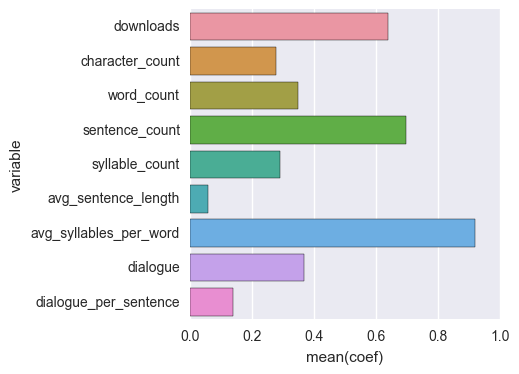

In [53]:
fig, ax = plt.subplots(figsize=(4,4))

sns.barplot(y = coef.variable, x = np.abs(coef.coef), data=coef,
           ax=ax
          )

Confusion matrix, without normalization
[[5602  358]
 [1470  588]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.71  0.29]]


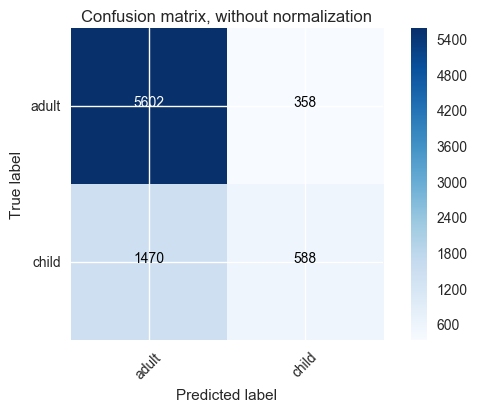

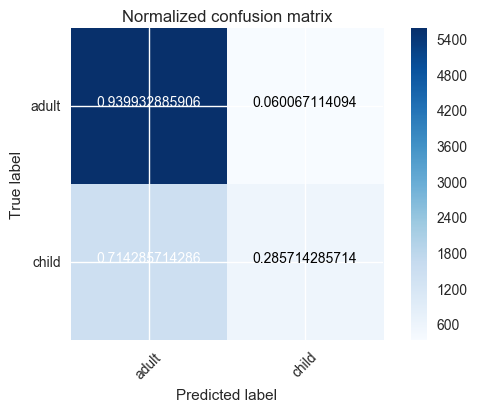

In [54]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
y_pred = lr.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['adult', 'child'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['adult', 'child'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()